In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from config import *

### Number of cells in one patch

In [4]:
names = [f for f in os.listdir(PATCH_MASK_PATH) if f.count('_') < 3]

In [5]:
numbers = np.zeros(len(names))

for i, name in enumerate(names):
    # load patch
    patch = cv2.imread(PATCH_MASK_PATH + name, cv2.IMREAD_GRAYSCALE)
    # count cells
    no_cells, _ = cv2.connectedComponents(patch)
    # append the count to the counts array
    numbers[i] = no_cells - 1

{'whiskers': [<matplotlib.lines.Line2D at 0x11c3ea590>,
 'caps': [<matplotlib.lines.Line2D at 0x11c3fac10>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b4c67d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11c406690>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c406b90>],
 'means': []}

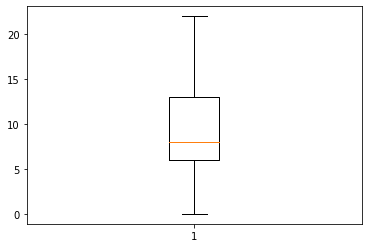

In [6]:
plt.boxplot(numbers)

(array([ 12., 127., 254., 207., 107., 157., 108.,  70.,  28.,  13.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

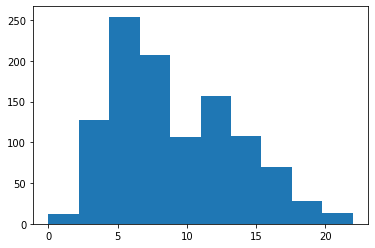

In [7]:
plt.hist(numbers)

<BarContainer object of 23 artists>

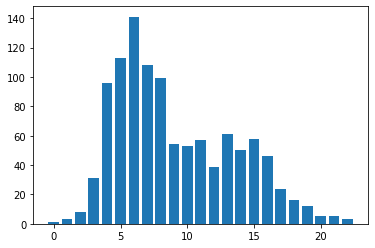

In [10]:
unique, counts = np.unique(numbers, return_counts=True)

plt.bar(unique, counts)

<BarContainer object of 3 artists>

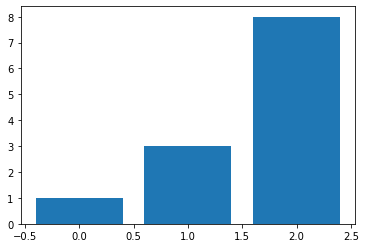

In [11]:
plt.bar(unique[:3], counts[:3])

<BarContainer object of 3 artists>

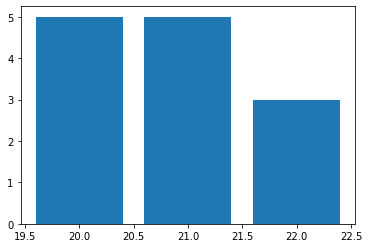

In [12]:
plt.bar(unique[20:], counts[20:])

### Cell areas

In [14]:
names = [f for f in os.listdir(TRAIN_MASK_PATH)]
len(names)

24

In [15]:
areas = [None] * len(names)

for i, name in enumerate(names):
    # load patch
    patch = cv2.imread(TRAIN_MASK_PATH + name, cv2.IMREAD_GRAYSCALE)
    # get contours
    contours,hierarchy = cv2.findContours(patch, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE )

    _areas = []

    for contour in contours:
        area = cv2.contourArea(contour)
        _areas.append(area)

    areas[i] = _areas

{'whiskers': [<matplotlib.lines.Line2D at 0x11c135e50>,
 'caps': [<matplotlib.lines.Line2D at 0x11c140950>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c1352d0>,
 'medians': [<matplotlib.lines.Line2D at 0x11c135f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x101a8e8d0>,
 'means': []}

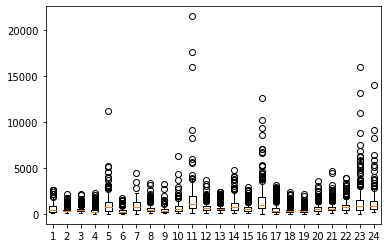

In [16]:
plt.boxplot(areas)

{'whiskers': [<matplotlib.lines.Line2D at 0x11da5a210>,
 'caps': [<matplotlib.lines.Line2D at 0x11da5ad10>,
 'boxes': [<matplotlib.lines.Line2D at 0x11da4f650>,
 'medians': [<matplotlib.lines.Line2D at 0x11d967790>,
 'fliers': [],
 'means': []}

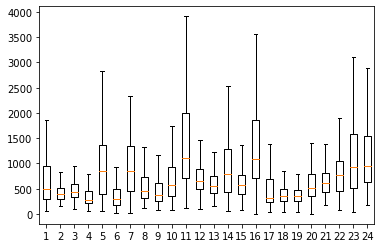

In [19]:
plt.boxplot(areas, showfliers=False)

In [44]:
# source: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
def flatten_list(l):
    return [item for sublist in l for item in sublist]

flat = np.array(flatten_list(areas))

print(max(flat))
print(min(flat))
print(np.median(flat))
print(np.mean(flat))
print(np.std(flat))

21891
2
475.0
687.3578894972624
816.7239701657049


{'whiskers': [<matplotlib.lines.Line2D at 0x11e0f3c50>,
 'caps': [<matplotlib.lines.Line2D at 0x11e0f7790>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e0f30d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11e0f3d50>],
 'fliers': [],
 'means': []}

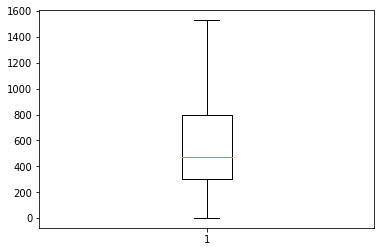

In [47]:
plt.boxplot(flat, showfliers=False)

<BarContainer object of 1993 artists>

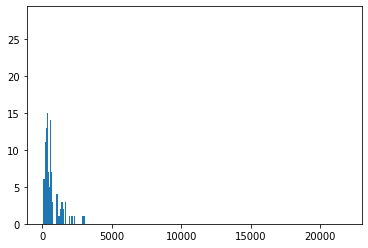

In [53]:
unique, counts = np.unique(flat, return_counts=True)

plt.bar(unique, counts)

In [54]:
max(flat[flat<max(flat)])

17987

In [ ]:
plt.boxplot(flat)

In [ ]:
plt.imshow(patch)

In [ ]:
m = np.zeros((*patch.shape, 3), dtype='uint8')
g = cv2.drawContours(m,contours,-1,(255, 255, 255),2)
plt.imshow(g)

In [ ]:
g = np.zeros((4,4))


In [ ]:
patch.shape